In [1]:
# librerias
import pandas as pd
import numpy as np

In [2]:
# archivo
path = "/home/luii/Documents/Modelacionysimulacion"
file = "LABClases/procesadores_garantia.csv"
data = pd.read_csv(path + "/" + file)
data

,MesGarantia,procesadori3,procesadori5,procesadori7,procesadori9,garantiascobradas
0,Enero,5,6,7,2,3
1,Febrero,10,5,4,1,5
2,Marzo,4,8,8,0,4
3,Abril,5,10,4,1,6
4,Mayo,3,3,10,4,2
5,Junio,5,5,5,5,7
6,Julio,5,5,5,5,7
7,Agosto,6,8,5,1,5
8,Septiembre,2,9,9,0,3
9,Octubre,0,9,9,2,3


## 1) Validar sí los procesadores son los que tienen una influencia en los cobros de garantía efectuados durante el 2019 desde enero a diciembre.

In [22]:
# promedio de ventas
promedio_gara = np.mean(data["garantiascobradas"])

In [19]:
import statsmodels.formula.api as smf

In [10]:
ml_multiple = smf.ols(formula="garantiascobradas~procesadori3+procesadori5+procesadori7+procesadori9", data=data).fit()

In [11]:
# parametros
ml_multiple.params

Intercept       0.058491
procesadori3    0.225762
procesadori5    0.591346
procesadori7   -0.394219
procesadori9    0.746926
dtype: float64

In [12]:
# valores
ml_multiple.pvalues

Intercept       0.000092
procesadori3    0.208359
procesadori5    0.013604
procesadori7    0.066296
procesadori9    0.015081
dtype: float64

In [13]:
# validacion del modelo
validaMulti = ml_multiple.rsquared_adj
print("El modelo tiene una presicion de: " + str(round(validaMulti*100,2)) + "%")

El modelo tiene una presicion de: 45.73%


In [15]:
# prediccion - plotear o validacion matematica
prediccionesmultiple = ml_multiple.predict(data[["procesadori3", "procesadori5", "procesadori7", "procesadori9"]])

In [16]:
prediccionesmultiple

0     3.469698
1     4.442893
2     2.538555
3     6.270809
4     1.555334
5     5.907569
6     5.907569
7     4.919662
8     2.284158
9     3.326486
10    3.469698
11    5.907569
dtype: float64

In [17]:
# validar la simulacion multiple
sumaDeCuadradosDiferenciaM = sum((data["garantiascobradas"]-prediccionesmultiple) ** 2)

In [24]:
ErrorestandarresidualN = np.sqrt(sumaDeCuadradosDiferenciaM / (len(data) - 5 - 1))

In [26]:
errorsimulacionM = ErrorestandarresidualN / promedio_gara
print("El modelo tiene un error de: " + str(round((errorsimulacionM*100), 2)) + "%")

El modelo tiene un error de: 42.5%


## 2) Verificar cuál es el procesador que mayor influencia tienen en los cobros de garantías. 

In [42]:
# libreria de impresion
import matplotlib.pyplot as plt

### Procesador i3

In [32]:
# garantiascobradas y procesador i3
ml_i3 = smf.ols(formula = "garantiascobradas~procesadori3", data=data).fit()
# parametros
ml_i3.params
# valores
ml_i3.pvalues

Intercept       0.060994
procesadori3    0.273710
dtype: float64

In [34]:
# validacion del modelo
valida_i3 = ml_i3.rsquared_adj
print("El modelo tiene una presicion de: " + str(round(valida_i3*100,2)) + "%")

El modelo tiene una presicion de: 3.01%


In [35]:
# validacion matematica
prediccion_i3 = ml_i3.predict(pd.DataFrame(data["procesadori3"]))

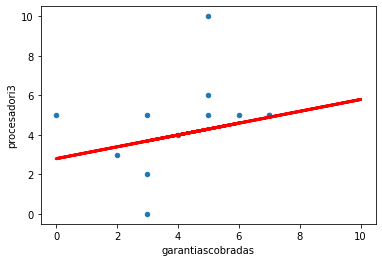

In [38]:
# dispersion
%matplotlib inline
data.plot(kind="scatter", x="garantiascobradas", y="procesadori3")
plt.plot(pd.DataFrame(data["procesadori3"]), prediccion_i3, c="red", linewidth=3)

### Procesador i5

In [39]:
# garantiascobradas y procesador i5
ml_i5 = smf.ols(formula = "garantiascobradas~procesadori5", data=data).fit()
# parametros
ml_i5.params
# valores
ml_i5.pvalues

Intercept       0.083340
procesadori5    0.958388
dtype: float64

In [54]:
# validacion del modelo
valida_i5 = ml_i5.rsquared_adj
print("El modelo tiene una presicion de: " + str(round(valida_i5*100,2)) + "%")

El modelo tiene una presicion de: -9.97


In [43]:
# validacion matematica
prediccion_i5 = ml_i5.predict(pd.DataFrame(data["procesadori5"]))

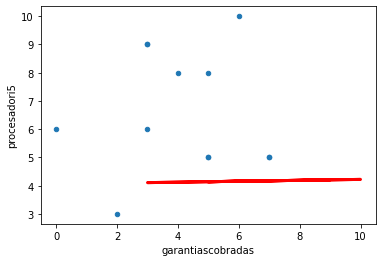

In [45]:
# dispersion
%matplotlib inline
data.plot(kind="scatter", x="garantiascobradas", y="procesadori5")
plt.plot(pd.DataFrame(data["procesadori5"]), prediccion_i5, c="red", linewidth=3)

### Procesador i7

In [46]:
# garantiascobradas y procesador i7
ml_i7 = smf.ols(formula = "garantiascobradas~procesadori7", data=data).fit()
# parametros
ml_i7.params
# valores
ml_i7.pvalues

Intercept       0.000185
procesadori7    0.010683
dtype: float64

In [47]:
# validacion del modelo
valida_i7 = ml_i7.rsquared_adj
print("El modelo tiene una presicion de: " + str(round(valida_i7*100,2)) + "%")

El modelo tiene una presicion de: 44.44%


In [48]:
# validacion matematica
prediccion_i7 = ml_i7.predict(pd.DataFrame(data["procesadori7"]))

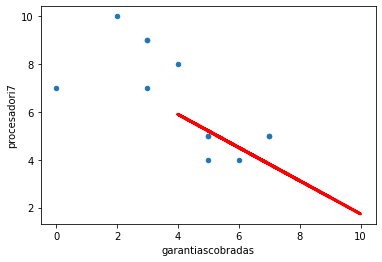

In [49]:
# dispersion
%matplotlib inline
data.plot(kind="scatter", x="garantiascobradas", y="procesadori7")
plt.plot(pd.DataFrame(data["procesadori7"]), prediccion_i7, c="red", linewidth=3)

### Procesador i9

In [50]:
# garantiascobradas y procesador i9
ml_i9 = smf.ols(formula = "garantiascobradas~procesadori9", data=data).fit()
# parametros
ml_i9.params
# valores
ml_i9.pvalues

Intercept       0.005961
procesadori9    0.301786
dtype: float64

In [51]:
# validacion del modelo
valida_i9 = ml_i9.rsquared_adj
print("El modelo tiene una presicion de: " + str(round(valida_i9*100,2)) + "%")

El modelo tiene una presicion de: 1.66%


In [52]:
# validacion matematica
prediccion_i9 = ml_i9.predict(pd.DataFrame(data["procesadori9"]))

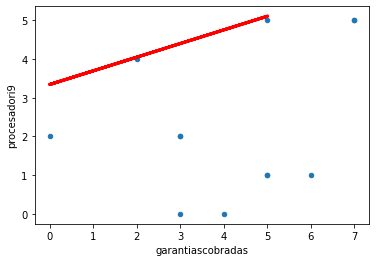

In [53]:
# dispersion
%matplotlib inline
data.plot(kind="scatter", x="garantiascobradas", y="procesadori9")
plt.plot(pd.DataFrame(data["procesadori9"]), prediccion_i9, c="red", linewidth=3)

## 3) Una pequeña presentación de resultados, con sus conclusiones  al respecto de estos, sus recomendaciones  y una gráfica de la influencia de los procesadores en los cobros de garantía con un histograma que será presentado después al inversionista de la tienda.

### Conclusiones y recomendaciones

In [69]:
# Conclusiones

# parte 1
#La influencia observada es de un 45.73 % por lo que podemos observar que las 
#garantías no tienen una relevancia directa con relación a la garantía de los productos 


# parte 2

# La influencia del procesador i3 con las garantias cobradas es del 3% por lo que se puede decir que no influye
# procesador con el cobro

# El procesador i5 tiene una influencia demasidado pequeña en el cobro de la garantia, por lo que tampoco
# es tomado como algo relevante, no influye en nada

# El procesador i7 tiene una influencia del 44%, por lo que tiene una alta probabilidad de tener influencia
# con el cobro de la garantia, puede ser por la incompatibilidad del procesador con los demas componentes

# El procesador i9 tiene una influencia del 1.66% por lo que tampoco es influyente en el cobro
# de la garantia


# recomendaciones
# Hay que echarle un ojo a los procesadores i7 porque son los que mas influencia tienes
# Hay que revisar los demás componentes de las computadoras porque es más probable que sean esos componentes
# los del problema en general

(array([1., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([-9.97  , -7.2495, -4.529 , -1.8085,  0.912 ,  3.6325,  6.353 ,
         9.0735, 11.794 , 14.5145, 17.235 , 19.9555, 22.676 , 25.3965,
        28.117 , 30.8375, 33.558 , 36.2785, 38.999 , 41.7195, 44.44  ]),
 <BarContainer object of 20 artists>)

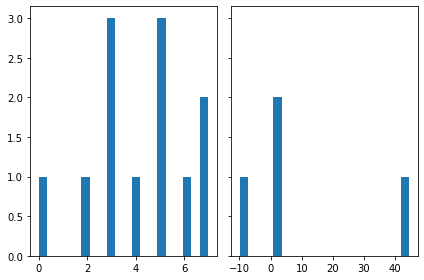

In [71]:

# creacion de lista con cada influencias
x_influ = []
x_influ.append(round(valida_i3*100,2))
x_influ.append(round(valida_i5*100,2))
x_influ.append(round(valida_i7*100,2))
x_influ.append(round(valida_i9*100,2))

n_bins=20

# histograma de precesadores y cobro de garantias
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(data["garantiascobradas"], bins=n_bins)
axs[1].hist(x_influ, bins=n_bins)